<div style="border:solid purple 2px; padding: 20px"> 

Привет Валерий! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Я не хочу указавать тебе на совершенные тобою ошибки, а хочу поделиться своим опытом и помочь тебе стать настоящим профессионалом и сделать проект еще лучше.

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

Мне понравился твой проект, есть пару замечаний, но их не много, я думаю ты быстро справишься. Жду твою работу на повторное ревью :)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Введение

По заданию отдела маркетинга «Бета-Банка» необходимо обучить модель, прогнозирующую отток клиентов. Для проверки качества модели нужно использовать метрики F1-меру и AUC-ROC. F1- мера модели кандидата должна быть не меньше 0.59.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Обнаружил 909 нулевых значений поля Tenure. Заменил их медианным значением.

In [5]:
#print(len(data.loc[data['CustomerId'].isna()]))
#print(len(data.loc[data['Surname'].isna()]))
#print(len(data.loc[data['CreditScore'].isna()]))
#print(len(data.loc[data['Geography'].isna()]))
#print(len(data.loc[data['Gender'].isna()]))
#print(len(data.loc[data['Age'].isna()]))
print(len(data.loc[data['Tenure'].isna()]))
#print(len(data.loc[data['Balance'].isna()]))
#print(len(data.loc[data['NumOfProducts'].isna()]))
#print(len(data.loc[data['HasCrCard'].isna()]))
#print(len(data.loc[data['IsActiveMember'].isna()]))
#print(len(data.loc[data['EstimatedSalary'].isna()]))
#print(len(data.loc[data['Exited'].isna()]))

909


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Можно было так, намного короче
    
    df.isna().mean()

In [6]:
#data.loc[data['Tenure'].isna(),'Tenure'] = data['Tenure'].median()
data.loc[data['Tenure'].isna(),'Tenure'] = 0

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Заполнить пропуски - решение правильное, но распределение по `Tenure` ровномерное, если сейчас заменить почти 900 пропусков (9% данных) средним или медианой, то мы значительно исказим распределение. Я бы лучше предпочел заполнить пропуски случайными значениями в интервале от минимального до максимального значения по данному столбцу. Так мы не нарушим распределение. Как еще можно было их обработать:
    
- Можно заполнить нулями, так мы предполагаем, что это новые клиенты.

- Так как значений в этом признаке ограниченное количество, можно сделать его категориальным признаком. Пропуски можно считать как за отдельную категорию (заполнить значением -1). Затем заменить тип данных `Tenure` на `object` и применить технику [OHE](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

<div class="alert alert-info"> <b>Комментарий студента:</b> Заполнил нулями</div>

Дибликатов не обнаружено.

In [7]:
print(data.duplicated().sum())

0


Удалил поля RowNumber, CustomerId и Surname, т.к. они не несут никакой полезной информации для нашей модели.

In [8]:
data.drop("RowNumber", axis=1, inplace=True)
data.drop("CustomerId", axis=1, inplace=True)
data.drop("Surname", axis=1, inplace=True)

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Согласен, что  неинформативные столбцы нам не нужны, а что насчет Surname? Нужен ли нам этот столбец?

<div class="alert alert-info"> <b>Комментарий студента:</b>Ох, сорри, проглядел! Surname тоже удалил.</div>

Предотвращаю попадание в дамми-ловушку при помощи метода get_dummies().

In [9]:
data_ohe = pd.get_dummies(data, drop_first=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

В данном случае это наиболее подходящий способ закодировать категориальные колонки 👍 И отдельный плюс за `drop_first`

In [10]:
target = data_ohe['Exited']
features = data_ohe.drop(['Exited'] , axis=1)

Разобью исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.

In [11]:
features_main, features_test, target_main, target_test = train_test_split(features, target, test_size=0.20, random_state=12345, stratify=target)

In [12]:
print(features_test.shape)
print(target_test.shape)

(2000, 11)
(2000,)


In [13]:
features_train, features_valid, target_train, target_valid = train_test_split(features_main, target_main, test_size=0.25, random_state=12345, stratify=target_main)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты фиксируешь `random_state`. Кстати, его можно задать один раз в начале проекта, например, используя любимый нами [numpy](https://pyprog.pro/random_sampling_functions/seed.html?)

In [14]:
print(features_valid.shape)
print(target_valid.shape)

(2000, 11)
(2000,)


In [15]:
print(features_train.shape)
print(target_train.shape)

(6000, 11)
(6000,)


Выделяю числовые признаки и масштабирую их с помощью функции Scaler.

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Стандартизация выполнена корректно, молодец! Кстати, хорошо бы проверить метрики без нее, возможно, результат будет лучше, а возможно, и нет. Дело в том, что алгоритмы основанные на лесах, на самом деле, не нуждаются в нормализации или стандартизации, в отличии от линейных моделей

Проверю сбалансированность классов в таргете.

In [17]:
(target[target == 0]).size

7963

In [18]:
(target[target == 1]).size

2037

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Здесь также можно было сократить решение

In [19]:
target.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

## Вывод

Проверил данные на пропуски и дубликаты. Удалил поля, не имеющие смысла для обучения. Провёл профилактику попадания в дамми-ловушку. Разобил исходные данные на обучающую, валидационную и тестовую выборки. Разбил данные на обучающие и целевые признаки. Выделил и промасштабировал числовые признаки. Проверил сбалансированность классов в таргете.
Классы в таргете не сбалансированы. Нулей 79.63%, единиц 20.37%. Т.е. примерно на 8 нулей (клиент остался) приходится 2 единицы (клиент ушёл).

## Исследование задачи

Исследую модели на несбалансированных данных.

Вначале исследую модель решающего дерева.

In [20]:
for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("max_depth =", depth)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

max_depth = 1
  F1 = 0.0
  AUC-ROC = 0.7020417952621343
max_depth = 2
  F1 = 0.514792899408284
  AUC-ROC = 0.7397559346711888
max_depth = 3
  F1 = 0.375
  AUC-ROC = 0.8041878550353126
max_depth = 4
  F1 = 0.5168539325842697
  AUC-ROC = 0.8272193611176661
max_depth = 5
  F1 = 0.46045694200351495
  AUC-ROC = 0.8326724258927649
max_depth = 6
  F1 = 0.5296950240770465
  AUC-ROC = 0.8250253334999098
max_depth = 7
  F1 = 0.5451713395638629
  AUC-ROC = 0.8264682247733095
max_depth = 8
  F1 = 0.5817655571635311
  AUC-ROC = 0.8073851972157057
max_depth = 9
  F1 = 0.5706293706293707
  AUC-ROC = 0.7928868776326403
max_depth = 10
  F1 = 0.5323741007194245
  AUC-ROC = 0.7717208734157888
max_depth = 11
  F1 = 0.5444743935309972
  AUC-ROC = 0.7533882110153296
max_depth = 12
  F1 = 0.5275590551181102
  AUC-ROC = 0.7384557130319842
max_depth = 13
  F1 = 0.5168831168831168
  AUC-ROC = 0.7262655567740313
max_depth = 14
  F1 = 0.49874055415617136
  AUC-ROC = 0.6970352478827055
max_depth = 15
  F1 = 0.5155

In [21]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

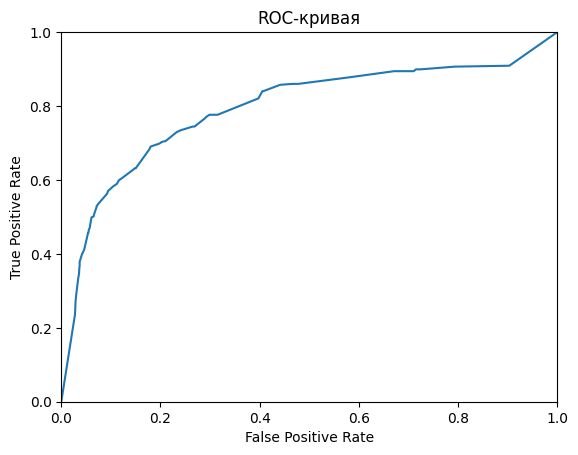

In [22]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Мне для счастья не хватает сетки

Модель решающего дерева показала наилучший результат  F1 = 0.5923836389280677 AUC-ROC = 0.8017856068703527 при max_depth=9

Исследую модель случайного леса.

In [23]:
for est in range(1, 21):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("est =", est)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

est = 1
  F1 = 0.47277227722772275
  AUC-ROC = 0.6687303636456179
est = 2
  F1 = 0.3698630136986301
  AUC-ROC = 0.7195600839668637
est = 3
  F1 = 0.5159574468085105
  AUC-ROC = 0.759558479897463
est = 4
  F1 = 0.47435897435897434
  AUC-ROC = 0.7762122677376915
est = 5
  F1 = 0.5267605633802818
  AUC-ROC = 0.7974461364291873
est = 6
  F1 = 0.5140186915887851
  AUC-ROC = 0.8101553016807255
est = 7
  F1 = 0.5542857142857144
  AUC-ROC = 0.8169533169533169
est = 8
  F1 = 0.5210608424336973
  AUC-ROC = 0.8219143642872456
est = 9
  F1 = 0.5411764705882354
  AUC-ROC = 0.8220300423690254
est = 10
  F1 = 0.5217391304347825
  AUC-ROC = 0.8280830907949552
est = 11
  F1 = 0.5592972181551976
  AUC-ROC = 0.8257587325383935
est = 12
  F1 = 0.5395348837209302
  AUC-ROC = 0.8259808344554107
est = 13
  F1 = 0.5479041916167664
  AUC-ROC = 0.8295529736207703
est = 14
  F1 = 0.5426356589147286
  AUC-ROC = 0.8300156859478893
est = 15
  F1 = 0.5543964232488824
  AUC-ROC = 0.8340196899518932
est = 16
  F1 = 0.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Чтобы добиться лучшего результата, можно перебирать несколько параметров, для случайного леса, например, можно еще поварьировать кол-во деревьев в ансамбле `max_depth`, или `min_samples_leaf`

In [24]:
model = RandomForestClassifier(random_state=12345, n_estimators=15)
model.fit(features_train, target_train) 
    
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

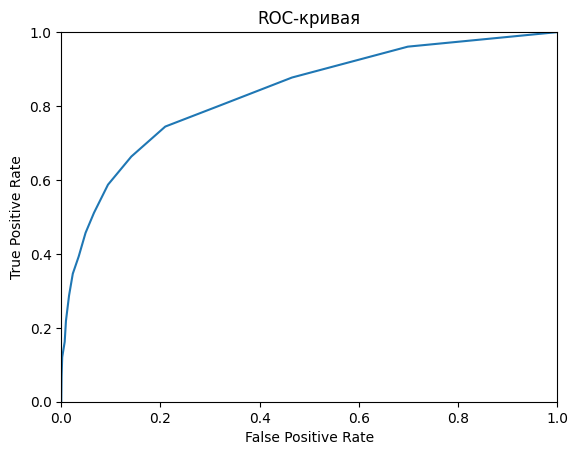

In [25]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Модель случайного леса показала наилучший результат  F1 = 0.5215946843853821 AUC-ROC = 0.8159276379615362 при n_estimators=15

Исследую модель логистической регрессии.

In [26]:
for itr in range(500, 1000, 100):
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=itr)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("itr =", itr)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

itr = 500
  F1 = 0.3214953271028037
  AUC-ROC = 0.7874237874237874
itr = 600
  F1 = 0.3214953271028037
  AUC-ROC = 0.7874237874237874
itr = 700
  F1 = 0.3214953271028037
  AUC-ROC = 0.7874237874237874
itr = 800
  F1 = 0.3214953271028037
  AUC-ROC = 0.7874237874237874
itr = 900
  F1 = 0.3214953271028037
  AUC-ROC = 0.7874237874237874


In [27]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=500)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

<div class="alert alert-success"> 
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты и здесь решила подобрать гиперпараметры. Хотя по мне, `solver` или `penalty` более важные параметры, я бы их перебирал.

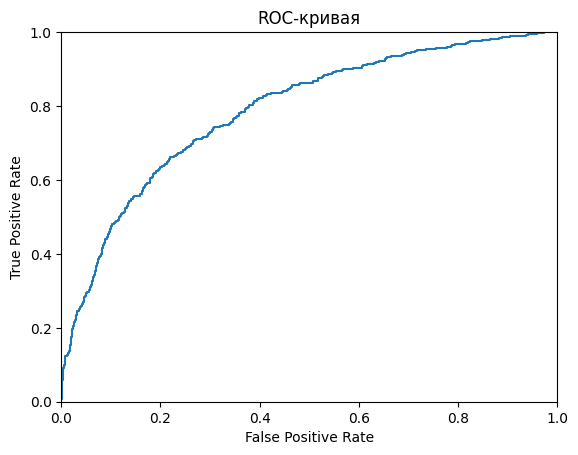

In [28]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 


Модель логистической регрессии показала наилучший результат F1 = 0.34050179211469533 AUC-ROC = 0.7699301767098378 при max_iter=500

## Вывод

На несбалансированных данных наилучший результат достигнут моделью решающего дерева  F1 = 0.5923836389280677 AUC-ROC = 0.8017856068703527 при max_depth=9

## Борьба с дисбалансом

Исходные данные несбалансированы примерно 8:2. Т.е. на каждые 8 случаев, когда клиент остался, приходится 2 случая, когда клиент ушёл.

In [29]:
features_zeros = features_train[target_train == 0] 
features_ones = features_train[target_train == 1] 
target_zeros = target_train[target_train == 0] 
target_ones = target_train[target_train == 1] 

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4777, 11)
(1223, 11)
(4777,)
(1223,)


Применю параметр class_weight='balanced' к модели решающего дерева

In [30]:
for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("max_depth =", depth)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

max_depth = 1
  F1 = 0.49916527545909845
  AUC-ROC = 0.7128962552691366
max_depth = 2
  F1 = 0.5074135090609556
  AUC-ROC = 0.7538000249864657
max_depth = 3
  F1 = 0.5336538461538461
  AUC-ROC = 0.8064212132008742
max_depth = 4
  F1 = 0.5422594142259414
  AUC-ROC = 0.8254055287953593
max_depth = 5
  F1 = 0.5593803786574871
  AUC-ROC = 0.834954368852674
max_depth = 6
  F1 = 0.5734639358860195
  AUC-ROC = 0.8329006973074768
max_depth = 7
  F1 = 0.5655296229802513
  AUC-ROC = 0.8133248811214913
max_depth = 8
  F1 = 0.559040590405904
  AUC-ROC = 0.7947431252515998
max_depth = 9
  F1 = 0.5314553990610329
  AUC-ROC = 0.7778749473664728
max_depth = 10
  F1 = 0.525911708253359
  AUC-ROC = 0.733955835650751
max_depth = 11
  F1 = 0.5161964472309301
  AUC-ROC = 0.72337900304002
max_depth = 12
  F1 = 0.5176470588235293
  AUC-ROC = 0.7127489585116704
max_depth = 13
  F1 = 0.5144766146993318
  AUC-ROC = 0.7069103001306392
max_depth = 14
  F1 = 0.4910313901345291
  AUC-ROC = 0.7007130396960906
max_de

In [31]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

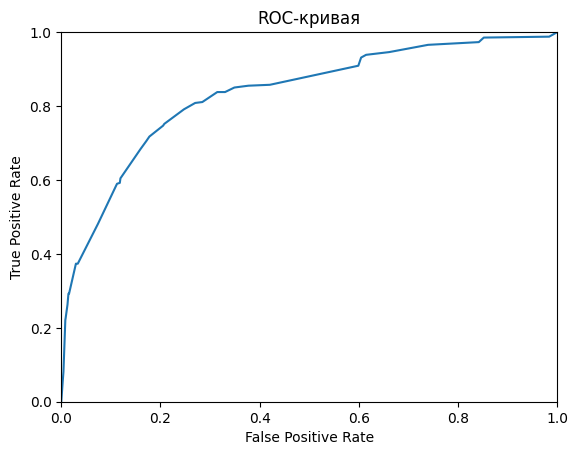

In [32]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Применю параметр class_weight='balanced' к модели случайного леса

In [33]:
for est in range(1, 21):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("est =", est)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

est = 1
  F1 = 0.4619105199516324
  AUC-ROC = 0.6627667729362645
est = 2
  F1 = 0.4271186440677966
  AUC-ROC = 0.7213145348738569
est = 3
  F1 = 0.5219780219780219
  AUC-ROC = 0.753093617500397
est = 4
  F1 = 0.49201277955271566
  AUC-ROC = 0.7700296598601684
est = 5
  F1 = 0.5360230547550433
  AUC-ROC = 0.78000728000728
est = 6
  F1 = 0.5229793977812995
  AUC-ROC = 0.7918002748511224
est = 7
  F1 = 0.5459854014598541
  AUC-ROC = 0.7957055668920076
est = 8
  F1 = 0.49597423510467
  AUC-ROC = 0.7966973136464663
est = 9
  F1 = 0.5171898355754857
  AUC-ROC = 0.8016028355011406
est = 10
  F1 = 0.5182829888712241
  AUC-ROC = 0.8059330516957636
est = 11
  F1 = 0.5258358662613982
  AUC-ROC = 0.8091388769354871
est = 12
  F1 = 0.5172413793103449
  AUC-ROC = 0.8138839918500935
est = 13
  F1 = 0.544360902255639
  AUC-ROC = 0.8173512495546394
est = 14
  F1 = 0.5133858267716535
  AUC-ROC = 0.8178694873610128
est = 15
  F1 = 0.5335365853658536
  AUC-ROC = 0.8214215756588638
est = 16
  F1 = 0.522834

In [34]:
model = RandomForestClassifier(random_state=12345, n_estimators=15, class_weight='balanced')
model.fit(features_train, target_train) 
    
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

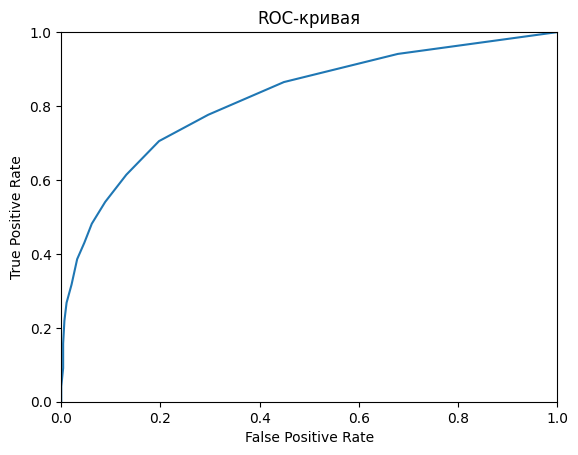

In [35]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Применю параметр class_weight='balanced' к модели логистической регрессии

In [36]:
for itr in range(500, 1000, 100):
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=itr, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("itr =", itr)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

itr = 500
  F1 = 0.5099739809193409
  AUC-ROC = 0.7917547748056223
itr = 600
  F1 = 0.5099739809193409
  AUC-ROC = 0.7917547748056223
itr = 700
  F1 = 0.5099739809193409
  AUC-ROC = 0.7917547748056223
itr = 800
  F1 = 0.5099739809193409
  AUC-ROC = 0.7917547748056223
itr = 900
  F1 = 0.5099739809193409
  AUC-ROC = 0.7917547748056223


In [37]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=500, class_weight='balanced')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

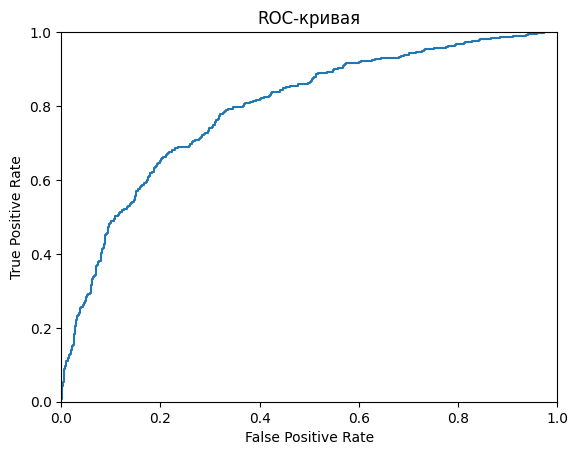

In [38]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Увеличил количество единиц при помощи техники upsampling.

In [39]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled 

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

features_zeros = features_upsampled[target_upsampled == 0] 
features_ones = features_upsampled[target_upsampled == 1] 
target_zeros = target_upsampled[target_upsampled == 0] 
target_ones = target_upsampled[target_upsampled == 1] 

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4777, 11)
(4892, 11)
(4777,)
(4892,)


Проверяю модель решающего дерева на сбалансированных данных.

In [40]:
for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("max_depth =", depth)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

max_depth = 1
  F1 = 0.49916527545909845
  AUC-ROC = 0.7128962552691366
max_depth = 2
  F1 = 0.5074135090609556
  AUC-ROC = 0.7538000249864657
max_depth = 3
  F1 = 0.5074135090609556
  AUC-ROC = 0.8064212132008742
max_depth = 4
  F1 = 0.5422594142259414
  AUC-ROC = 0.833317909589096
max_depth = 5
  F1 = 0.5606190885640585
  AUC-ROC = 0.8388110760992116
max_depth = 6
  F1 = 0.5752688172043011
  AUC-ROC = 0.8339865289017832
max_depth = 7
  F1 = 0.5665467625899281
  AUC-ROC = 0.8135755169653475
max_depth = 8
  F1 = 0.542910447761194
  AUC-ROC = 0.7918727664490377
max_depth = 9
  F1 = 0.5391140433553252
  AUC-ROC = 0.7659469947605542
max_depth = 10
  F1 = 0.5201177625122668
  AUC-ROC = 0.7352352352352354
max_depth = 11
  F1 = 0.5144628099173554
  AUC-ROC = 0.7181202774423113
max_depth = 12
  F1 = 0.5153764581124072
  AUC-ROC = 0.7118489830354238
max_depth = 13
  F1 = 0.49943757030371205
  AUC-ROC = 0.6984873934026476
max_depth = 14
  F1 = 0.49551569506726456
  AUC-ROC = 0.6986177240414528


In [41]:
model = DecisionTreeClassifier(random_state=12345, max_depth=8)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

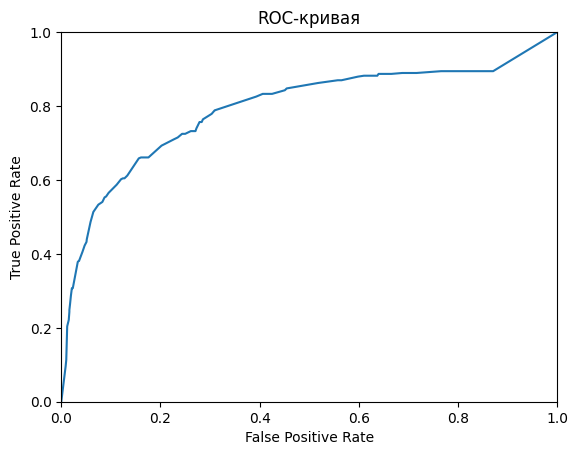

In [42]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Проверяю модель случайного леса на сбалансированных данных.

In [43]:
for est in range(1, 21):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("est =", est)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

est = 1
  F1 = 0.49077090119435396
  AUC-ROC = 0.6872457974152889
est = 2
  F1 = 0.4559270516717326
  AUC-ROC = 0.7424743695930136
est = 3
  F1 = 0.5190476190476191
  AUC-ROC = 0.767153902747123
est = 4
  F1 = 0.5233380480905233
  AUC-ROC = 0.7826979521894776
est = 5
  F1 = 0.5648484848484848
  AUC-ROC = 0.7965870338751695
est = 6
  F1 = 0.5611111111111111
  AUC-ROC = 0.8046312876821352
est = 7
  F1 = 0.5696517412935324
  AUC-ROC = 0.8001653425382238
est = 8
  F1 = 0.5479082321187585
  AUC-ROC = 0.8065122132918743
est = 9
  F1 = 0.5739348370927317
  AUC-ROC = 0.8143266533097042
est = 10
  F1 = 0.5740987983978638
  AUC-ROC = 0.8199293284039046
est = 11
  F1 = 0.5801526717557253
  AUC-ROC = 0.823908654417129
est = 12
  F1 = 0.5756756756756757
  AUC-ROC = 0.8289984900154392
est = 13
  F1 = 0.5839793281653747
  AUC-ROC = 0.8329253752982566
est = 14
  F1 = 0.5752688172043011
  AUC-ROC = 0.8343983428729191
est = 15
  F1 = 0.5777202072538861
  AUC-ROC = 0.8351803267057505
est = 16
  F1 = 0.57

In [44]:
model = RandomForestClassifier(random_state=12345, n_estimators=19)
model.fit(features_upsampled, target_upsampled)
    
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


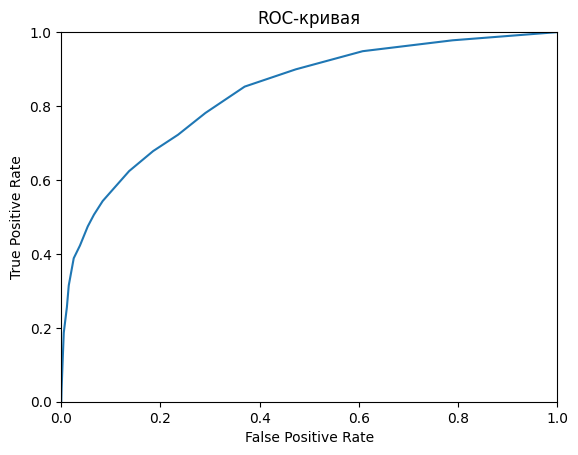

In [45]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Проверяю модель логистической регрессии на сбалансированных данных.

In [46]:
for itr in range(500, 1000, 100):
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=itr)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("itr =", itr)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

itr = 500
  F1 = 0.5068493150684932
  AUC-ROC = 0.7917995036639105
itr = 600
  F1 = 0.5068493150684932
  AUC-ROC = 0.7917995036639105
itr = 700
  F1 = 0.5068493150684932
  AUC-ROC = 0.7917995036639105
itr = 800
  F1 = 0.5068493150684932
  AUC-ROC = 0.7917995036639105
itr = 900
  F1 = 0.5068493150684932
  AUC-ROC = 0.7917995036639105


In [47]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=500)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


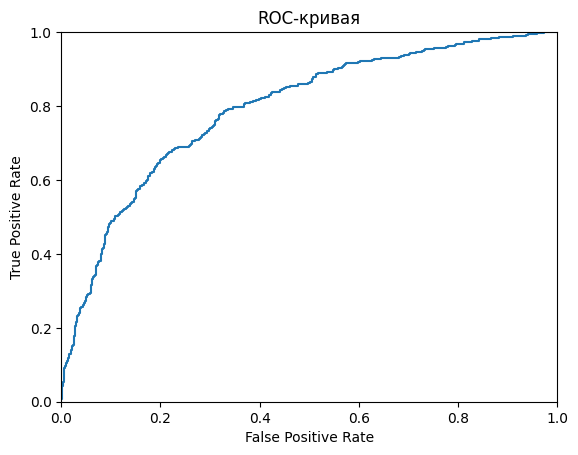

In [48]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Может стоит взять repeat чуть больше? Дисбаланс как-будто все еще присутствует

<div class="alert alert-info"> <b>Комментарий студента:</b>Увеличил количество повторов до 4 и добавил серию тестов для upsampled данных.</div>

Уменьшил количество нолей при помощи техники downsampling, предварительно увеличивая количество единиц при помощи upsampling с числом повторов 2.

In [49]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)
features_balanced, target_balanced = downsample(features_upsampled, target_upsampled, 0.512)


features_zeros = features_balanced[target_balanced == 0] 
features_ones = features_balanced[target_balanced == 1] 
target_zeros = target_balanced[target_balanced == 0] 
target_ones = target_balanced[target_balanced == 1] 

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(2446, 11)
(2446, 11)
(2446,)
(2446,)


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

А вот здесь все отлично

Проверяю модель решающего дерева на сбалансированных данных.

In [50]:
for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_balanced, target_balanced)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("max_depth =", depth)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)

max_depth = 1
  F1 = 0.4804381846635367
  AUC-ROC = 0.7001253950406494
max_depth = 2
  F1 = 0.4860681114551083
  AUC-ROC = 0.7406111812891475
max_depth = 3
  F1 = 0.5159817351598174
  AUC-ROC = 0.7942888959838112
max_depth = 4
  F1 = 0.5220883534136547
  AUC-ROC = 0.8136611187458646
max_depth = 5
  F1 = 0.5564168819982773
  AUC-ROC = 0.8336865370763675
max_depth = 6
  F1 = 0.5587703435804702
  AUC-ROC = 0.8327765361663666
max_depth = 7
  F1 = 0.5568181818181818
  AUC-ROC = 0.8126732279274652
max_depth = 8
  F1 = 0.5699693564862104
  AUC-ROC = 0.7866849900748207
max_depth = 9
  F1 = 0.5475206611570248
  AUC-ROC = 0.7749058766007919
max_depth = 10
  F1 = 0.5242914979757084
  AUC-ROC = 0.741785699412818
max_depth = 11
  F1 = 0.5351239669421487
  AUC-ROC = 0.7462285089403734
max_depth = 12
  F1 = 0.5353846153846155
  AUC-ROC = 0.7309829089490106
max_depth = 13
  F1 = 0.5067778936392076
  AUC-ROC = 0.7059470873030196
max_depth = 14
  F1 = 0.5015290519877675
  AUC-ROC = 0.7023965413795922
ma

In [51]:
model = DecisionTreeClassifier(random_state=12345, max_depth=8)
model.fit(features_balanced, target_balanced)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


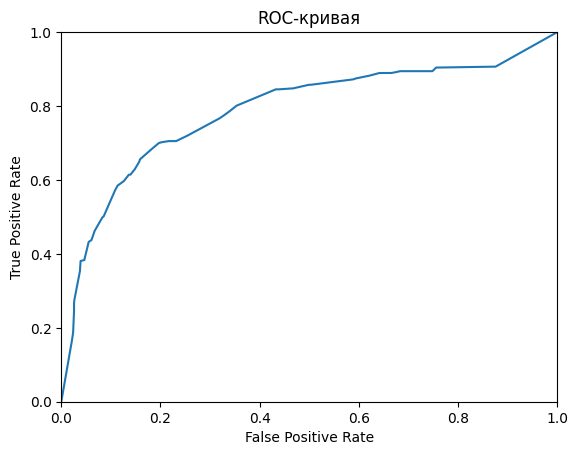

In [52]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Модель решающего дерева показала наилучший результат  F1 = 0.5894519131334023 AUC-ROC = 0.8084093338330627 при max_depth=8

Проверяю модель случайного леса на сбалансированных данных.

In [53]:
for est in range(1, 21):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_balanced, target_balanced)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("est =", est)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)


est = 1
  F1 = 0.47689463955637706
  AUC-ROC = 0.6860681945427708
est = 2
  F1 = 0.4986945169712793
  AUC-ROC = 0.7413530633869616
est = 3
  F1 = 0.5239043824701195
  AUC-ROC = 0.7762076406144203
est = 4
  F1 = 0.5400739827373613
  AUC-ROC = 0.7882512713021188
est = 5
  F1 = 0.5542916235780766
  AUC-ROC = 0.8011678859136486
est = 6
  F1 = 0.5636147443519619
  AUC-ROC = 0.8067227474007135
est = 7
  F1 = 0.5567226890756302
  AUC-ROC = 0.8122930326320157
est = 8
  F1 = 0.5727482678983834
  AUC-ROC = 0.8153261119362815
est = 9
  F1 = 0.562566844919786
  AUC-ROC = 0.8146058230803994
est = 10
  F1 = 0.5780346820809249
  AUC-ROC = 0.8194843533826585
est = 11
  F1 = 0.5705059203444564
  AUC-ROC = 0.8217308217308217
est = 12
  F1 = 0.5866050808314088
  AUC-ROC = 0.8261713176967415
est = 13
  F1 = 0.5895196506550219
  AUC-ROC = 0.8305416356263814
est = 14
  F1 = 0.6032863849765258
  AUC-ROC = 0.832643120778714
est = 15
  F1 = 0.5912087912087912
  AUC-ROC = 0.8323392730172392
est = 16
  F1 = 0.59

In [54]:
model = RandomForestClassifier(random_state=12345, n_estimators=19)
model.fit(features_balanced, target_balanced)
    
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


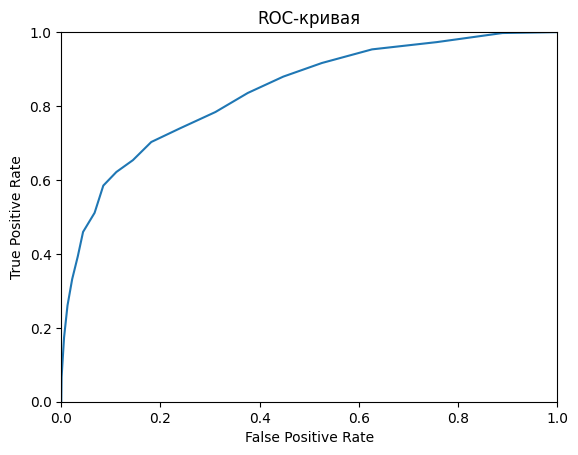

In [55]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Модель случайного леса показала наилучший результат  F1 = 0.6129032258064515 AUC-ROC = 0.8377021088885495 при n_estimators=19

Проверяю модель логистической регрессии на сбалансированных данных.

In [56]:
for itr in range(500, 1000, 100):
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=itr)
    model.fit(features_balanced, target_balanced)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1 = f1_score(target_valid, predictions_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("itr =", itr)
    print('  F1 =', f1)
    print('  AUC-ROC =', auc_roc)


itr = 500
  F1 = 0.5087412587412588
  AUC-ROC = 0.7906195872297567
itr = 600
  F1 = 0.5087412587412588
  AUC-ROC = 0.7906195872297567
itr = 700
  F1 = 0.5087412587412588
  AUC-ROC = 0.7906195872297567
itr = 800
  F1 = 0.5087412587412588
  AUC-ROC = 0.7906195872297567
itr = 900
  F1 = 0.5087412587412588
  AUC-ROC = 0.7906195872297567


<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Индикаторы состояния: progress и tqdm <a class="tocSkip"> </h3>

Как перестать беспокоиться о том, не завис ли скрипт? Вы можете создавать свои индикаторы состояния. Это весьма увлекательное занятие. Но делать то же самое с [progress](https://pypi.org/project/progress/) (ее обычно используют для работы из консоли) или [tqdm](https://pypi.org/project/tqdm/) (отлично подойдет для тетрадок) куда быстрее и надежнее.

Обычно я использую эти две библиотеки, но вот [здесь](https://habr.com/ru/post/483400/) ты можешь почитать про альтернативные варианты

![](https://i.ibb.co/B4SDm8Y/68747470733a2f2f7261772e6769746875622e636f6d2f7665726967616b2f70726f67726573732f6d61737465722f64656d.gif)

In [57]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=500)
model.fit(features_balanced, target_balanced)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


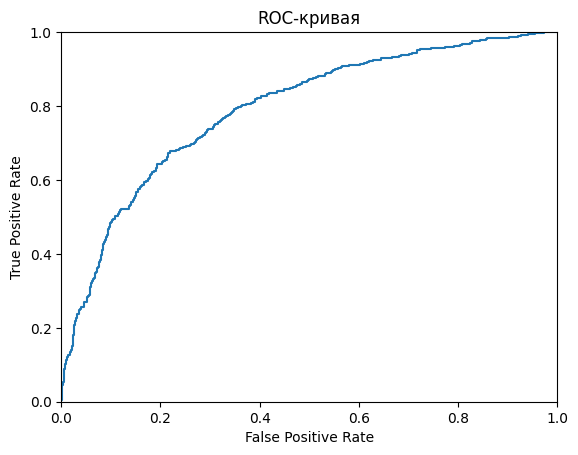

In [58]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Модель логистической регрессии показала наилучший результат F1 = 0.5058087578194818 AUC-ROC = 0.7604075570177264 при max_iter=500

## Вывод

На сбалансированных данных наилучший результат достигнут моделью случайного леса F1 = 0.6129032258064515 AUC-ROC = 0.8377021088885495 при n_estimators=19

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

В проекте просят протестировать несколько методов борьбы с дисбалансом. downsample ты реализовал, а upsample нет. Также можно попробовать встроенный функционал-гипперпараметр `class_weight='balanced'`

<div class="alert alert-info"> <b>Комментарий студента:</b>Добавил серию тестов для upsampled data. Текже добавил тесты для моделей с гиперпараметром class_weight='balanced'</div>

## Тестирование модели

Проверяю модель случайного леса с n_estimators=19 на тестовой выборке.

In [59]:
model = RandomForestClassifier(random_state=12345, n_estimators=19)
model.fit(features_balanced, target_balanced)
predictions_test = model.predict(features_test) 
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

f1 = f1_score(target_test, predictions_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print("F1-мера:", f1)
print("AUC-ROC:", auc_roc)

F1-мера: 0.6039823008849557
AUC-ROC: 0.8449720907348026


<s>Данные метрик неудовлетворительные. Это связано, скорее всего, с тем, что модель обучалась на масштабированных данных, а прогноз делается не на масштабированных. Поэтому масштабирую тестовые данные при помощи техники upsampling.</s>

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Не совсем правильно.Низкие метрики связаны с тем, что обучающую выборку ты стандартизируешь через StandardScaler, а тестовую нет. Масштабирование тестовой выборки через upsampling здесь никак не поможет, это нужжно убрать

<div class="alert alert-info"> <b>Комментарий студента:</b> Поправил. Спасибо!</div>

In [60]:
#features_test_upsampled, target_test_upsampled = upsample(features_test, target_test, 2)

#features_zeros = features_test_upsampled[target_test_upsampled == 0] 
#features_ones = features_test_upsampled[target_test_upsampled == 1] 
#target_zeros = target_test_upsampled[target_test_upsampled == 0] 
#target_ones = target_test_upsampled[target_test_upsampled == 1] 

#print(features_zeros.shape)
#print(features_ones.shape)
#print(target_zeros.shape)
#print(target_ones.shape)

<s>Масштабирую тестовую выборку при помощи техники downsampling.</s>

In [61]:
#features_test_balanced, target_test_balanced = downsample(features_test_upsampled, target_test_upsampled, 0.511)

#features_zeros = features_test_balanced[target_test_balanced == 0] 
#features_ones = features_test_balanced[target_test_balanced == 1] 
#target_zeros = target_test_balanced[target_test_balanced == 0] 
#target_ones = target_test_balanced[target_test_balanced == 1] 

#print(features_zeros.shape)
#print(features_ones.shape)
#print(target_zeros.shape)
#print(target_ones.shape)

<s>Провожу финальное тестировоание на сбалансированной выборке. При этом изменяю значение порога в цикле.</s>

In [62]:
#predictions_test = model.predict(features_test_balanced) 
#probabilities_test = model.predict_proba(features_test_balanced)
#probabilities_one_test = probabilities_test[:, 1]

#for threshold in np.arange(0, 0.3, 0.02):
#    predicted_test = probabilities_one_test > threshold 
#    precision = precision_score(target_test_balanced, predicted_test)
#    recall = recall_score(target_test_balanced, predicted_test)
#    f1 = 2 * precision * recall / (precision + recall) 

#    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
#        threshold, precision, recall, f1))

## Вывод

Модель для прогнозирования оттока построена и обучена. Наилучшее значение F1 меры, полученное в процессе тестирования = 0.6039823008849557

## Раздел для тренировок с GitHub

Проверяю модель решающего дерева на тестовой выборке с параметром max_depth=8 (с этим параметром я добился наилучшего результата на валидационной выборке)

In [63]:
model = DecisionTreeClassifier(random_state=12345, max_depth=8)
model.fit(features_balanced, target_balanced)
predictions_test = model.predict(features_test) 
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

f1 = f1_score(target_test, predictions_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print("F1-мера:", f1)
print("AUC-ROC:", auc_roc)

F1-мера: 0.578616352201258
AUC-ROC: 0.8032192438972101


Получил значение F1-меры ниже целевой.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*